In [1]:
import pandas as pd
import numpy as np
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import torch
from transformers import TrainingArguments, Trainer
from transformers import BertTokenizer, BertForSequenceClassification, XLMRobertaTokenizer

c:\Users\Tanner\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

c:\Users\Tanner\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [3]:
#if youre using a GPU you can check if cuda is available
#print(torch.cuda.is_available())

In [24]:

model_2 = BertForSequenceClassification.from_pretrained("IndustryModel")
model_2.to('cuda')

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [5]:
cap_df = pd.read_csv("C:/Users/Tanner/OneDrive/Documents/School_Work/Capstone/2024-05-24v2_oth_export_ideas.csv")
cap_df.head()

,user_hash,user_created_at,user_last_ip_city,user_last_ip_region,user_last_ip_country_name,user_last_ip_country_region,user_last_ip_country_subregion,user_last_ip_postal_code,user_email_domain,idea_id,...,canvas_early_adopters,canvas_customer_segments,canvas_existing_alternatives,canvas_nr_of_tokens_prompt,canvas_nr_of_tokens_completion,competitor_id,competitors_direct,competitors_indirect,competitors_alternatives,competitor_ways_to_play
0,e58a3f7a52e1acbfbafae5951cfc31b1,9/2/2023 21:46,Dallas,Texas,United States,Americas,Northern America,75201,zigzag.vc,13,...,#NAME?,#NAME?,#NAME?,666,324,844,#NAME?,#NAME?,#NAME?,1. **Customization**\n- Offering fully customi...
1,e58a3f7a52e1acbfbafae5951cfc31b1,9/2/2023 21:46,Dallas,Texas,United States,Americas,Northern America,75201,zigzag.vc,12,...,#NAME?,#NAME?,#NAME?,781,438,7,#NAME?,#NAME?,#NAME?,1. **Offering a complete entertainment package...
2,ede3b91a2dadfb94d5f9b88cc0109b71,9/2/2023 23:26,Berkeley,California,United States,Americas,Northern America,94703,gmail.com,14,...,#NAME?,#NAME?,#NAME?,694,357,1814,#NAME?,#NAME?,#NAME?,1. **Tailor-Made Workouts**\n- Developing AI-e...
3,778cf8f5af962a93757fbfedb3e2fb9e,9/3/2023 1:13,Boulder,Colorado,United States,Americas,Northern America,80309,gmail.com,15,...,#NAME?,#NAME?,#NAME?,654,345,1307,#NAME?,#NAME?,#NAME?,1. **Innovative Advertising Space**\n- Capital...
4,c3eaa4cbf406153f0b893f42675d9730,9/3/2023 2:06,Calgary,Alberta,Canada,Americas,Northern America,T3S,gmail.com,16,...,Large pool of job seekers including but not li...,Job seekers across all industries\nGraduates l...,Generic resume templates\nOnline resume builde...,785,485,9,#NAME?,#NAME?,#NAME?,1. **AI Integration**:\n - Developing an AI ...


In [6]:
#drop all rows with null idea descriptions
cap_df = cap_df.dropna(subset=['idea_description'])

In [17]:
inputs = list(cap_df['idea_description'])

In [19]:
#if you want to use cuda with the tokenizer add .to('cuda') to the end of the line below
inputs = tokenizer(inputs,padding = True, truncation = True, return_tensors='pt')
print(inputs)

{'input_ids': tensor([[  101,  2019, 19012,  ...,     0,     0,     0],
        [  101,  1037,  2449,  ...,     0,     0,     0],
        [  101,  2019,  6377,  ...,     0,     0,     0],
        ...,
        [  101,  2395,  2028,  ...,     0,     0,     0],
        [  101,  1037,  2189,  ...,     0,     0,     0],
        [  101,  2057,  3073,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}


In [10]:
import time

In [11]:
#function to break of how many predictions are made at a time. This is to prevent memory errors
def predict_in_batches(model, inputs, batch_size=32):
    model.eval()
    all_logits = []
    for i in range(0, len(inputs['input_ids']), batch_size):
        batch = {k: v[i:i+batch_size].to(model.device) for k, v in inputs.items()}
        with torch.no_grad():
            outputs = model(**batch)
            logits = outputs.logits
        all_logits.append(logits.cpu())
    return torch.cat(all_logits)

In [25]:
#add labels to every idea in the csv file
batch_size = 8
logits = predict_in_batches(model_2, inputs, batch_size=batch_size)
predicted_labels = torch.argmax(logits, dim=1).tolist()


In [14]:
print(predicted_labels)

[8]


In [22]:
#test of speed on one idea
start = time.time()
input = "an ai platform that can help with the creation of a website"
input = tokenizer(input, padding = True, truncation = True, return_tensors='pt')
logits = predict_in_batches(model_2, input)
predicted_labels = torch.argmax(logits, dim=1).tolist()
end = time.time()
print(end - start)




0.08699870109558105


In [26]:
#add predicted labels to dataframe
cap_df['predicted_labels'] = predicted_labels
cap_df.head()

,user_hash,user_created_at,user_last_ip_city,user_last_ip_region,user_last_ip_country_name,user_last_ip_country_region,user_last_ip_country_subregion,user_last_ip_postal_code,user_email_domain,idea_id,...,canvas_customer_segments,canvas_existing_alternatives,canvas_nr_of_tokens_prompt,canvas_nr_of_tokens_completion,competitor_id,competitors_direct,competitors_indirect,competitors_alternatives,competitor_ways_to_play,predicted_labels
0,e58a3f7a52e1acbfbafae5951cfc31b1,9/2/2023 21:46,Dallas,Texas,United States,Americas,Northern America,75201,zigzag.vc,13,...,#NAME?,#NAME?,666,324,844,#NAME?,#NAME?,#NAME?,1. **Customization**\n- Offering fully customi...,2
1,e58a3f7a52e1acbfbafae5951cfc31b1,9/2/2023 21:46,Dallas,Texas,United States,Americas,Northern America,75201,zigzag.vc,12,...,#NAME?,#NAME?,781,438,7,#NAME?,#NAME?,#NAME?,1. **Offering a complete entertainment package...,11
2,ede3b91a2dadfb94d5f9b88cc0109b71,9/2/2023 23:26,Berkeley,California,United States,Americas,Northern America,94703,gmail.com,14,...,#NAME?,#NAME?,694,357,1814,#NAME?,#NAME?,#NAME?,1. **Tailor-Made Workouts**\n- Developing AI-e...,9
3,778cf8f5af962a93757fbfedb3e2fb9e,9/3/2023 1:13,Boulder,Colorado,United States,Americas,Northern America,80309,gmail.com,15,...,#NAME?,#NAME?,654,345,1307,#NAME?,#NAME?,#NAME?,1. **Innovative Advertising Space**\n- Capital...,10
4,c3eaa4cbf406153f0b893f42675d9730,9/3/2023 2:06,Calgary,Alberta,Canada,Americas,Northern America,T3S,gmail.com,16,...,Job seekers across all industries\nGraduates l...,Generic resume templates\nOnline resume builde...,785,485,9,#NAME?,#NAME?,#NAME?,1. **AI Integration**:\n - Developing an AI ...,1


In [ ]:
#a dictionary to map the labels to the industry names. This was made in the training notebook
ind_dict = {0: 'Apps', 1: 'Artificial Intelligence', 2: 'Ecommerce & Retail', 3: 'Educuation', 4: 'Energy & Environment', 5: 'Enterprise Technology', 6: 'Fintech', 7: 'Food & Beverage', 8: 'Hardware & IoT', 9: 'Healthcare', 10: 'Marketing & Sales', 11: 'Social & Leisure', 12: 'Software & Data', 13: 'Transportation'}

In [ ]:
#convert predicted labels to industry names
cap_df['predicted_labels'] = cap_df['predicted_labels'].map(ind_dict)

In [ ]:
cap_df.head()

,user_hash,user_created_at,user_last_ip_city,user_last_ip_region,user_last_ip_country_name,user_last_ip_country_region,user_last_ip_country_subregion,user_last_ip_postal_code,user_email_domain,idea_id,...,canvas_customer_segments,canvas_existing_alternatives,canvas_nr_of_tokens_prompt,canvas_nr_of_tokens_completion,competitor_id,competitors_direct,competitors_indirect,competitors_alternatives,competitor_ways_to_play,predicted_labels
0,e58a3f7a52e1acbfbafae5951cfc31b1,2023-09-02 21:46:38,Dallas,Texas,United States,Americas,Northern America,75201,zigzag.vc,13.0,...,- Women of all age groups\n- Organized individ...,- Organizing manually\n- Using small pouches i...,666.0,324.0,844.0,- Baggallini\n- PurseN\n- Samorga\n- Divider S...,- Zipper pouches\n- Makeup Bags\n- Mini Handba...,- DIY Handbag organizers\n- Using Ziplock bags...,1. **Customization**\n- Offering fully customi...,Ecommerce & Retail
1,e58a3f7a52e1acbfbafae5951cfc31b1,2023-09-02 21:46:38,Dallas,Texas,United States,Americas,Northern America,75201,zigzag.vc,12.0,...,- Corporate event organizers\n- Concert organi...,"- Traditional event entertainers (magicians, m...",781.0,438.0,7.0,- Magic Mirror Events\n- Faces For Fun\n- Part...,"- Other forms of entertainment like magicians,...",- DIY balloon animal kits\n- Hiring a craft en...,1. **Offering a complete entertainment package...,Social & Leisure
2,ede3b91a2dadfb94d5f9b88cc0109b71,2023-09-02 23:26:31,Berkeley,California,United States,Americas,Northern America,94703,gmail.com,14.0,...,- Mechanical watch wearers\n- Tech-savvy adult...,- Smartwatches\n- Fitness bands\n- Mobile apps...,694.0,357.0,1814.0,- Whoop\n- Fitbit\n- Garmin\n- Myzone\n- Polar...,- Apple Watch\n- Samsung Galaxy Watch\n- Xiaom...,- Traditional Fitness Trackers\n- Use of fitne...,1. **Tailor-Made Workouts**\n- Developing AI-e...,Healthcare
3,778cf8f5af962a93757fbfedb3e2fb9e,2023-09-03 01:13:13,Boulder,Colorado,United States,Americas,Northern America,80309,gmail.com,15.0,...,- Large corporates\n- Government organizations...,- Billboard advertising\n- TV and digital adve...,654.0,345.0,1307.0,- Moon Express\n- Astrobotic Technology\n- Spa...,- Advertising Balloons\n- Skywriting Services\...,- Use of giant screen projectors\n- Blimps wit...,1. **Innovative Advertising Space**\n- Capital...,Marketing & Sales
4,c3eaa4cbf406153f0b893f42675d9730,2023-09-03 02:06:55,Calgary,Alberta,Canada,Americas,Northern America,T3S,gmail.com,16.0,...,Job seekers across all industries\nGraduates l...,Generic resume templates\nOnline resume builde...,785.0,485.0,9.0,- ResyMatch\n- Jobscan\n- Skillsyncer\n- Resun...,- LinkedIn\n- Glassdoor\n- Indeed\n- Resume Pr...,- Manual Keyword matching\n- Using free online...,1. **AI Integration**:\n - Developing an AI ...,Artificial Intelligence


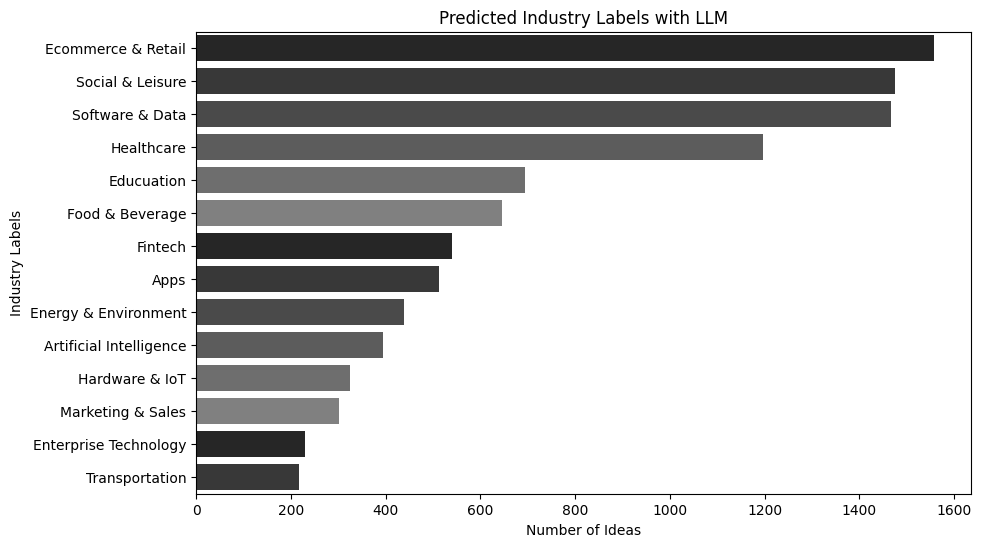

In [ ]:
#make a bar graph of the predicted labels
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(y='predicted_labels', data=cap_df, order=cap_df['predicted_labels'].value_counts().index, palette=sns.dark_palette("grey", reverse=False))
#add title
plt.title('Predicted Industry Labels with LLM')
#add x-axis label
plt.xlabel('Number of Ideas')
#add y-axis label
plt.ylabel('Industry Labels')
#plot the data
plt.show()

In [ ]:
#export dataframe to csv if you want to save a csv of the dataframe change the file path to where you want to save it
#cap_df.to_csv("C:/Users/Tanner/OneDrive/Documents/School_Work/Capstone/2024-05-24v3_oth_export_ideas.csv", index=False)